In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# makes graphs beautiful 
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [4]:
from scipy.stats import spearmanr

#  Lets look at Correlations

In [5]:
df = sns.load_dataset("anscombe")

In [6]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [8]:
df.dataset.value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

## 1. Pearson

In [11]:
df[df["dataset"]=="I"]["x"]

0     10.0
1      8.0
2     13.0
3      9.0
4     11.0
5     14.0
6      6.0
7      4.0
8     12.0
9      7.0
10     5.0
Name: x, dtype: float64

In [12]:
df[df["dataset"]=="I"]["y"]

0      8.04
1      6.95
2      7.58
3      8.81
4      8.33
5      9.96
6      7.24
7      4.26
8     10.84
9      4.82
10     5.68
Name: y, dtype: float64

In [14]:
np.corrcoef(df[df["dataset"]=="I"]["x"], 
            df[df["dataset"]=="I"]["y"])[0,1]

0.81642051634484

In [15]:
pea_corr = np.corrcoef(x = df[df["dataset"]=="I"]["x"],
           y = df[df["dataset"]=="I"]["y"])[0][1]
pea_corr

0.81642051634484

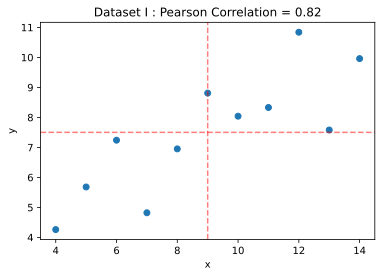

In [20]:
plt.scatter(df[df["dataset"]== "I"]["x"], 
            df[df["dataset"]== "I"]["y"])

plt.title(f"Dataset I : Pearson Correlation = {np.round(pea_corr,2)}")

plt.xlabel("x")
plt.ylabel("y")

plt.axhline(y = df[df["dataset"]=="I"]["y"].mean(), linestyle = '--', color = 'red',alpha = 0.5)

plt.axvline(x = df[df["dataset"]=="I"]["x"].mean(), linestyle = '--', color = 'red',alpha = 0.5)


In [21]:
data_set_number = df.dataset.unique()
data_set_number

array(['I', 'II', 'III', 'IV'], dtype=object)

In [22]:
correlations_dict = {}

for num in data_set_number:
    
    pearson_corr = np.corrcoef(df[df["dataset"]== num]["x"], 
                               df[df["dataset"]== num]["y"])[0][1]
    
    correlations_dict[num] = np.round(pearson_corr,2)

In [23]:
correlations_dict

{'I': 0.82, 'II': 0.82, 'III': 0.82, 'IV': 0.82}

In [24]:
df.groupby(["dataset"]).agg({"mean", "std"})

x                   y          
        mean       std      mean       std
dataset                                   
I        9.0  3.316625  7.500909  2.031568
II       9.0  3.316625  7.500909  2.031657
III      9.0  3.316625  7.500000  2.030424
IV       9.0  3.316625  7.500909  2.030579

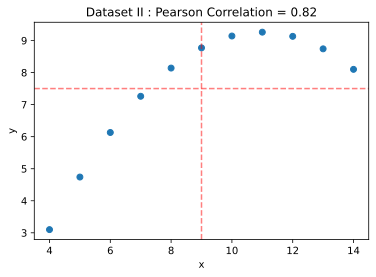

In [25]:
num = data_set_number[1]

plt.scatter(df[df["dataset"]== num]["x"], 
            df[df["dataset"]== num]["y"])

plt.title(f"Dataset {num} : Pearson Correlation = {np.round(pea_corr,2)}")

plt.xlabel("x")
plt.ylabel("y")


plt.axhline(y = df[df["dataset"]==num]["y"].mean(), linestyle = '--', color = 'red',alpha =0.5)
plt.axvline(x = df[df["dataset"]==num]["x"].mean(), linestyle = '--', color = 'red',alpha =0.5)

plt.show()

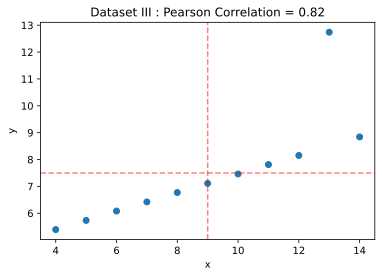

In [26]:
num = data_set_number[2]

plt.scatter(df[df["dataset"]== num]["x"], 
            df[df["dataset"]== num]["y"])

plt.title(f"Dataset {num} : Pearson Correlation = {np.round(pea_corr,2)}")

plt.xlabel("x")
plt.ylabel("y")


plt.axhline(y = df[df["dataset"]==num]["y"].mean(), linestyle = '--', color = 'red',alpha =0.5)
plt.axvline(x = df[df["dataset"]==num]["x"].mean(), linestyle = '--', color = 'red',alpha =0.5)

plt.show()

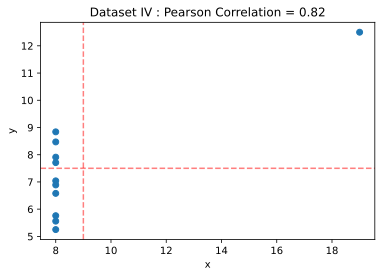

In [27]:
num = data_set_number[3]

plt.scatter(df[df["dataset"]== num]["x"], 
            df[df["dataset"]== num]["y"])

plt.title(f"Dataset {num} : Pearson Correlation = {np.round(pea_corr,2)}")

plt.xlabel("x")
plt.ylabel("y")


plt.axhline(y = df[df["dataset"]==num]["y"].mean(), linestyle = '--', color = 'red',alpha =0.5)
plt.axvline(x = df[df["dataset"]==num]["x"].mean(), linestyle = '--', color = 'red',alpha =0.5)

plt.show()

## Spearman

In [30]:
x = np.array([1,4,6,9,11,12,13,14,15,15.5]) # years of experience
y = np.array([4,5,7,9,12,15,17,18,28,32])  # Salary (in 100K)

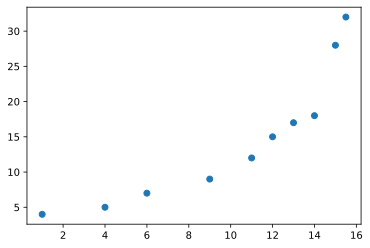

In [31]:
plt.scatter(x,y)

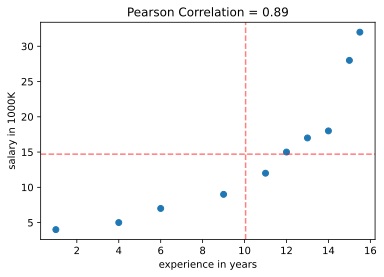

In [32]:
x = np.array([1,4,6,9,11,12,13,14,15,15.5])
y = np.array([4,5,7,9,12,15,17,18,28,32])

plt.scatter(x,y)
plt.title(f"Pearson Correlation = {np.round(np.corrcoef(x,y),2)[0][1]}")
plt.xlabel("experience in years")
plt.ylabel("salary in 1000K")
plt.axhline(y = y.mean(), linestyle = '--', color = 'red',alpha =0.5)
plt.axvline(x = x.mean(), linestyle = '--', color = 'red',alpha =0.5)

plt.show()

In [33]:
## perfect spearman correlation
np.round(spearmanr(x,y)[0])

1.0

## comapring pearson vs spearman

In [35]:
sp_corr = spearmanr(df[df["dataset"]=="I"]["x"], 
                    df[df["dataset"]=="I"]["y"])[0]
np.round(sp_corr,2)

0.82

In [36]:
correlations_dict = {}

for num in data_set_number:
    
    pearson_corr = np.corrcoef(df[df["dataset"]==num]["x"], 
                               df[df["dataset"]==num]["y"])[0][1]
    
    spearman_corr = spearmanr(df[df["dataset"]==num]["x"], 
                               df[df["dataset"]==num]["y"])[0]
    
    correlations_dict[num] = [np.round(pearson_corr,2), np.round(spearman_corr,2)]
    

In [37]:
correlations_dict

{'I': [0.82, 0.82], 'II': [0.82, 0.69], 'III': [0.82, 0.99], 'IV': [0.82, 0.5]}

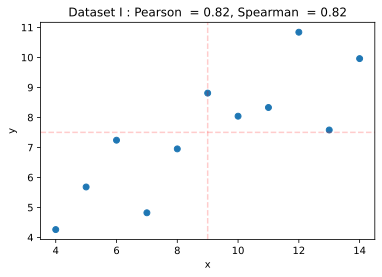

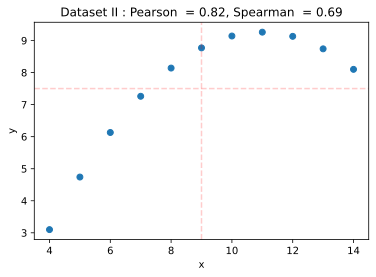

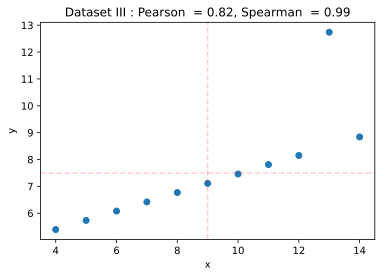

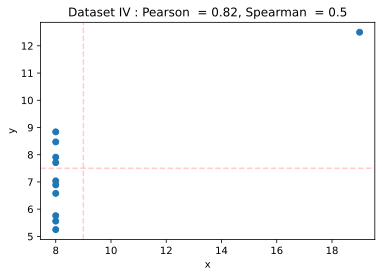

In [38]:
for num in data_set_number:
    plt.scatter(df[df["dataset"]==num]["x"], 
                df[df["dataset"]==num]["y"])
    
    plt.title(f"Dataset {num} : Pearson  = {correlations_dict[num][0]}, Spearman  = {correlations_dict[num][1]}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axhline(y = df[df["dataset"]==num]["y"].mean(), linestyle = '--', color = 'red',alpha =0.2)
    plt.axvline(x = df[df["dataset"]==num]["x"].mean(), linestyle = '--', color = 'red',alpha =0.2)
    
    plt.show()